In [1]:
%matplotlib ipympl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Import own code
from interactive_trigger_class import InteractiveTrigger

sb.set()

SN1 = "../data/SN1_Chirp_300kHzTemplate_0p16SNR_280Start_Sig.npy"  # Nasty noise
SN2 = "../data/SN2_Chirp_300kHzTemplate_0p32SNR_280Start_Sig.npy"  # Nice noise
SX1 = "../data/SX1_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_99mV.npy"
SX2 = "../data/SX2_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_132mV.npy"
SX3 = "../data/SX3_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_264mV.npy"
XN1 = "../data/XN1_Chirp_300kHzTemplate_0p16SNR_280Start_Noise.npy"
XN2 = "../data/XN2_Chirp_300kHzTemplate_0p32SNR_280Start_Noise.npy"


In [2]:
data = {}
# data["SN1"] = np.array(list( zip(*np.load(SN1)) ))
# data["SN2"] = np.array(list( zip(*np.load(SN2)) ))
data["SX1"] = np.array(list( zip(*np.load(SX1)) ))
# data["SX2"] = np.array(list( zip(*np.load(SX2)) ))
# data["SX3"] = np.array(list( zip(*np.load(SX3)) ))
data["XN1"] = np.array(list( zip(*np.load(XN1)) ))
data["XN2"] = np.array(list( zip(*np.load(XN2)) ))

df = pd.read_csv("../data/SX1+XN1.csv")
# data["SX1+XN1"] = [list(df.t), list(df.signal)]
data["SX1+XN2"] = [df.t, df.signal]
df = pd.read_csv("../data/SX1+XN2.csv")
# data["SX1+XN2"] = [list(df.t), list(df.signal)]
data["SX1+XN2"] = [df.t, df.signal]

SX1_truth_data_df = pd.read_csv("../data/SX1_truth_data.csv")
SX1_truth_data = SX1_truth_data_df.truth_data


In [3]:
import ipywidgets as widgets
label = widgets.Label(value='Text Captured : ')
text = widgets.Text(description="Text")

def text_change(change):
    # print(change)
    label.value = "Text Captured : "+change["new"]

text.observe(text_change, names='value')

display(label, text)

Label(value='Text Captured : ')

Text(value='', description='Text')

Label(value='Hitrate: 1.000')

Label(value='Misfire rate: 0.239')

interactive(children=(IntSlider(value=100, description='Delay samples', layout=Layout(width='50%'), max=300, s…

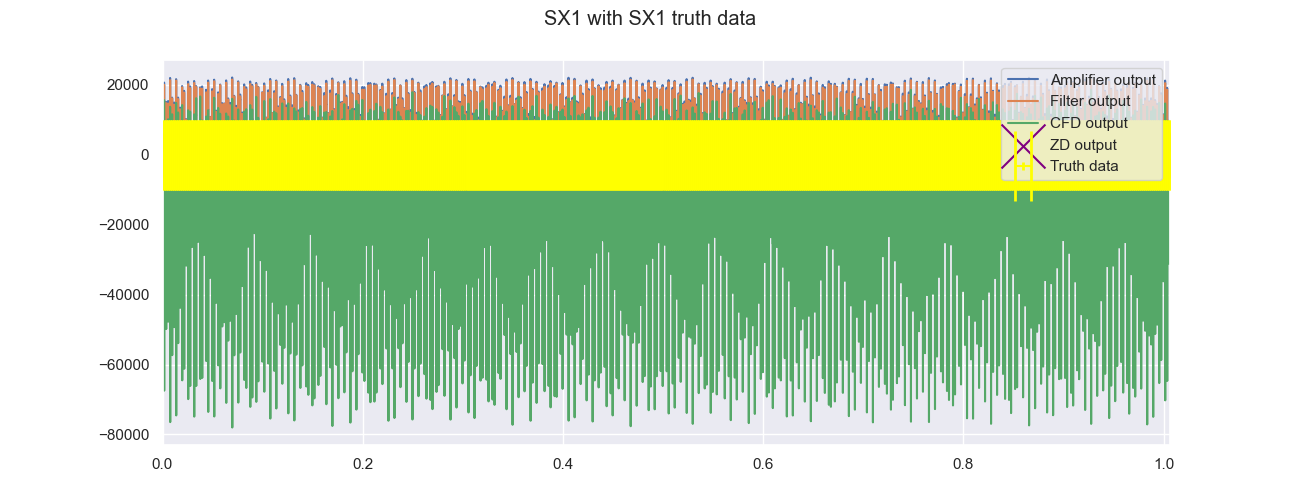

In [4]:
image1 = InteractiveTrigger(
        data = data["SX1"],
        truth_data = SX1_truth_data,
        title = "SX1 with SX1 truth data",
    )
image1.show()


Label(value='Hitrate: 0.284')

Label(value='Misfire rate: 0.667')

interactive(children=(IntSlider(value=100, description='Delay samples', layout=Layout(width='50%'), max=300, s…

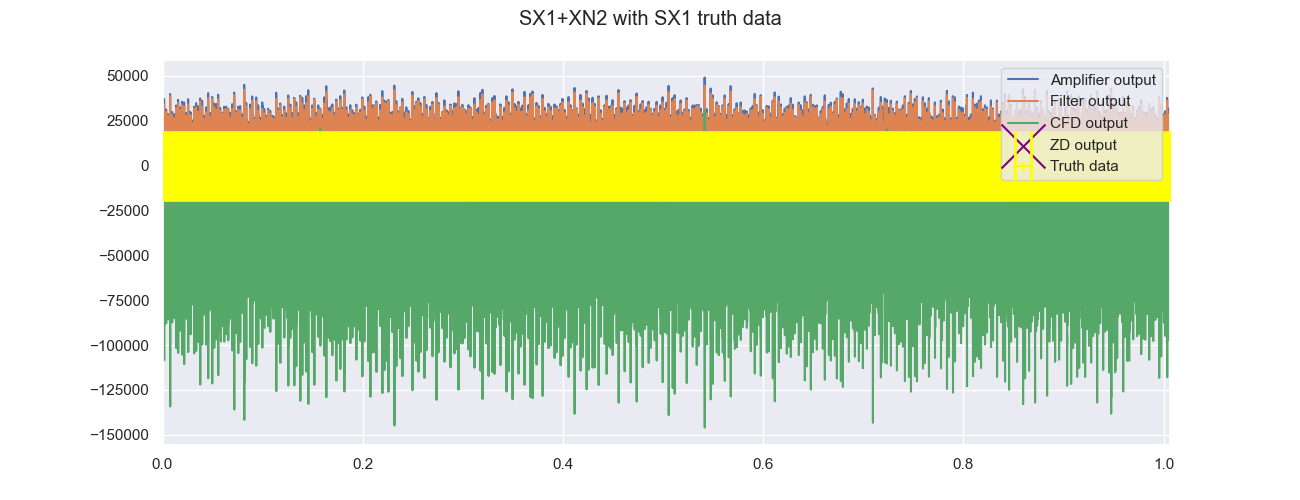

In [5]:
image2 = InteractiveTrigger(
        data["SX1+XN2"],
        truth_data = SX1_truth_data,
        title = "SX1+XN2 with SX1 truth data",
    )
image2.show()


C:\Users\roysi\Files\URSS\qtnm-trigger-cfd\analysis\signal_data_class.py:120: RuntimeWarning: invalid value encountered in scalar divide
  hitrate = hits / total_signals


Label(value='Hitrate: nan')

Label(value='Misfire rate: 1.000')

interactive(children=(IntSlider(value=100, description='Delay samples', layout=Layout(width='50%'), max=300, s…

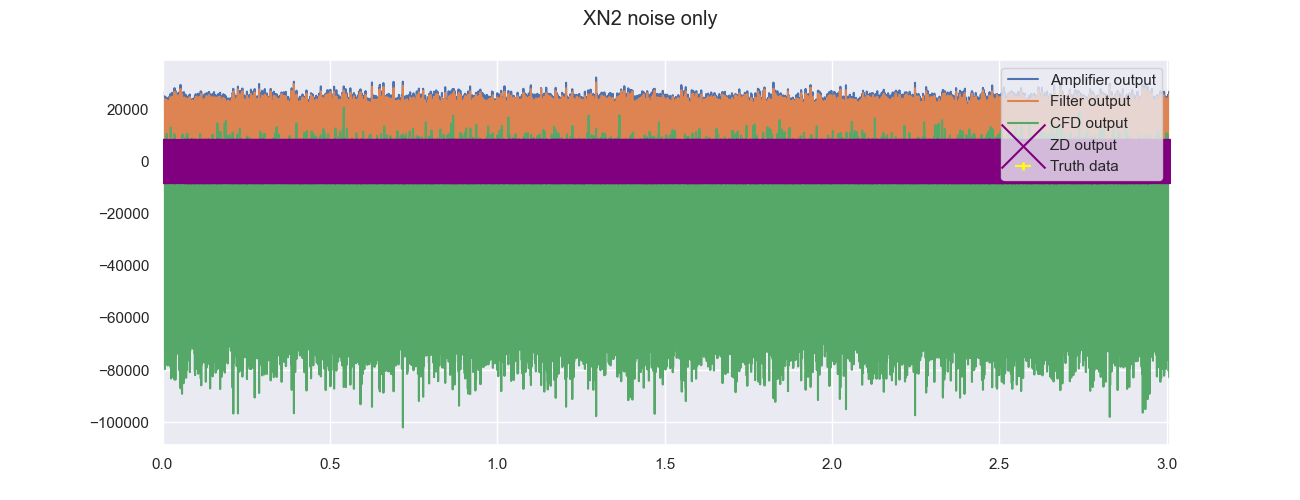

In [6]:
image3 = InteractiveTrigger(
        data["XN2"],
        title = "XN2 noise only",
    )
image3.show()
